## 7. 모델평가

### 7-1 데이터 불러오기 및 데이터셋 분할

In [1]:
import pandas as pd

# 경고 메시지가 안나오게 하기
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 데이터 불러오기
data = pd.read_csv('Fvote.csv')
data.head()

,gender_female,gender_male,region_Chungcheung,region_Honam,region_Others,region_Sudo,region_Youngnam,edu,income,age,score_gov,score_progress,score_intention,vote,parties
0,0,1,0,0,0,0,1,3,3,3,2,2,4.0,1,2
1,0,1,0,0,1,0,0,2,3,3,2,4,3.0,0,3
2,0,1,0,1,0,0,0,1,2,4,1,3,2.8,1,4
3,1,0,0,0,0,1,0,2,1,3,5,4,2.6,1,1
4,0,1,0,0,0,1,0,1,2,4,4,3,2.4,1,1


In [3]:
# 특성치와 레이블 데이터 셋 구분
X = data[data.columns[:13]]
y = data[['vote']]

In [4]:
# 데이터셋 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=42)

---

### 7-2. Grid Search

In [5]:
# 그리드 서치를 위한 라이브러리
from sklearn.model_selection import GridSearchCV

In [6]:
# LogisticRegression 알고리즘 적용
from sklearn.linear_model import LogisticRegression
logi = LogisticRegression()

In [7]:
param = {'C':[0.001,0.01,0.1,1,10,100]}

In [8]:
# 그리드서치를 로지스틱 모델에 적용
grid_search = GridSearchCV(logi, param, cv=5, return_train_score = True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [9]:
# 정확도가 가장 높은 하이퍼파라미터 및 정확도 제시
print(f"Best Parameter: {grid_search.best_params_}")
print(f"Best Cross-validity Score: {round(grid_search.best_score_,2)}")

Best Parameter: {'C': 10}
Best Cross-validity Score: 0.73


In [10]:
print(f"Best Cross-validity Score: {round(grid_search.score(X_test, y_test),2)}")

Best Cross-validity Score: 0.68


In [11]:
# 그리드 서치 하이퍼 파라미터 상세 결과값
result_grid = pd.DataFrame(grid_search.cv_results_)
result_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003986,0.000628,0.001197,0.000400,0.001,{'C': 0.001},0.68750,0.71875,0.71875,0.709677,...,0.708871,0.011430,5,0.714286,0.706349,0.706349,0.708661,0.708661,0.708861,0.002903
1,0.003593,0.000495,0.001006,0.000010,0.01,{'C': 0.01},0.68750,0.71875,0.71875,0.709677,...,0.708871,0.011430,5,0.714286,0.706349,0.706349,0.708661,0.708661,0.708861,0.002903
2,0.000797,0.001594,0.000235,0.000470,0.1,{'C': 0.1},0.71875,0.71875,0.71875,0.677419,...,0.721573,0.030797,3,0.730159,0.738095,0.738095,0.740157,0.708661,0.731034,0.011698
3,0.007643,0.006994,0.004081,0.005935,1,{'C': 1},0.71875,0.68750,0.81250,0.580645,...,0.721169,0.085441,4,0.738095,0.785714,0.730159,0.763780,0.724409,0.748431,0.022993
4,0.009936,0.005804,0.000200,0.000400,10,{'C': 10},0.75000,0.68750,0.81250,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.779528,0.724409,0.749994,0.021586
5,0.012543,0.006272,0.000115,0.000230,100,{'C': 100},0.75000,0.68750,0.81250,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567


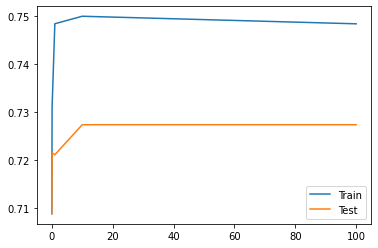

In [12]:
# 하이퍼파라미터에 따른 훈련 데이터와 테스트데이터의 정확도 그래프
import matplotlib.pyplot as plt
plt.plot(result_grid['param_C'], result_grid['mean_train_score'], label='Train')
plt.plot(result_grid['param_C'], result_grid['mean_test_score'], label='Test')
plt.legend()

---

### 7-3. Random Search

In [13]:
# 랜덤서치를 위한 라이브러리
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [14]:
# 로지스틱 적용
from sklearn.linear_model import LogisticRegression
logi = LogisticRegression()

In [15]:
# 하이퍼 파라미터 설정
param_distribs = {'C' : randint(low=0.001, high=100)}

In [16]:
# 랜덤서치를 로지스틱 모델에 적용
#  # n_iter=100, 랜덤횟수 디폴트=10
random_search = RandomizedSearchCV(logi, param_distribs, cv=5, return_train_score = True)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000167818BE100>},
                   return_train_score=True)

In [17]:
# 정확도가 높은 하이퍼파라미터 출력
print(f"Best Parameter: {random_search.best_params_}")
print(f"Best Cross-validity Score: {round(random_search.best_score_,3)}")

Best Parameter: {'C': 99}
Best Cross-validity Score: 0.727


In [18]:
# 테스트 데이터에 최적 탐색 하이퍼 파라미터 적용 정확도
print(f"Best Cross-validity Score Test: {round(random_search.score(X_test, y_test),3)}")

Best Cross-validity Score Test: 0.679


In [19]:
# 랜덤서치 하이퍼파라미터별 상세 결과값
result_random = random_search.cv_results_
pd.DataFrame(result_random)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.012171,0.001924,0.000998,0.000004,99,{'C': 99},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
1,0.005365,0.006125,0.003327,0.006162,61,{'C': 61},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
2,0.013173,0.003013,0.000402,0.000492,33,{'C': 33},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
3,0.008429,0.007239,0.000228,0.000455,78,{'C': 78},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
4,0.009373,0.007653,0.000000,0.000000,65,{'C': 65},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
5,0.009660,0.007427,0.003427,0.006128,17,{'C': 17},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.779528,0.724409,0.749994,0.021586
6,0.009373,0.007653,0.000000,0.000000,35,{'C': 35},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
7,0.012499,0.006249,0.000000,0.000000,18,{'C': 18},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.779528,0.724409,0.749994,0.021586
8,0.009513,0.007772,0.000000,0.000000,81,{'C': 81},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567
9,0.009391,0.007668,0.003126,0.006253,71,{'C': 71},0.75,0.6875,0.8125,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567


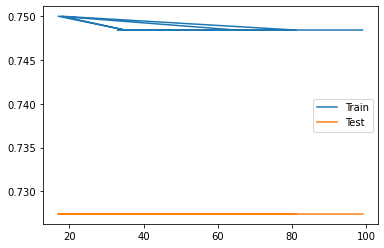

In [20]:
# 하이퍼파리미터(C)값에 따른 훈련데이터와 테스트데이터의 정확도(accuracy) 그래프
import matplotlib.pyplot as plt
plt.plot(result_random['param_C'], result_random['mean_train_score'], label="Train")
plt.plot(result_random['param_C'], result_random['mean_test_score'], label="Test")
plt.legend()

---



### 7-4 모델평가

In [21]:
grid_search.best_params_['C']

10

In [22]:
# 모델 탐색 결과, 최적의 하이퍼파라미터 결정 및 적용
Final_model = LogisticRegression(C=grid_search.best_params_['C'])
Final_model.fit(X_train, y_train)

LogisticRegression(C=10)

In [23]:
# 훈련데이터의 정확도 결과
pred_train = Final_model.predict(X_train)
Final_model.score(X_train, y_train)

0.740506329113924

In [24]:
# 테스트데이터의 정확도 결과
pred_test = Final_model.predict(X_test)
Final_model.score(X_test, y_test)

0.6792452830188679

In [25]:
# 훈련데이터의 혼동행렬
from sklearn.metrics import confusion_matrix

confusion_train = confusion_matrix(y_train, pred_train)
print('훈련데이터 오차행렬\n',confusion_train)

훈련데이터 오차행렬
 [[ 12  34]
 [  7 105]]


In [26]:
# 훈련데이터의 분류 모델 평가 결과
from sklearn.metrics import classification_report
cfreport_train = classification_report(y_train, pred_train)
print('분류예측 레포트:\n', cfreport_train)

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.63      0.26      0.37        46
           1       0.76      0.94      0.84       112

    accuracy                           0.74       158
   macro avg       0.69      0.60      0.60       158
weighted avg       0.72      0.74      0.70       158



In [27]:
# 테스트데이터의 정확도 결과
confusion_test = confusion_matrix(y_test, pred_test)
print('테스트데이터의 오차행렬\n', confusion_test)

테스트데이터의 오차행렬
 [[ 3 12]
 [ 5 33]]


In [28]:
# 테스트데이터의 분류 모델 평가
from sklearn.metrics import classification_report
cfreport_test = classification_report(y_test, pred_test)
print('분류예측 레포트: \n', cfreport_test)

분류예측 레포트: 
               precision    recall  f1-score   support

           0       0.38      0.20      0.26        15
           1       0.73      0.87      0.80        38

    accuracy                           0.68        53
   macro avg       0.55      0.53      0.53        53
weighted avg       0.63      0.68      0.64        53



In [31]:
# ROC 계산을 위한 라이브러리 및 산출식
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, Final_model.decision_function(X_test))
roc_auc = metrics.roc_auc_score(y_test, Final_model.decision_function(X_test))
roc_auc

0.6350877192982456

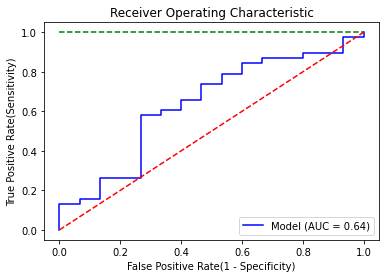

In [37]:
# ROC Curve 작성
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(false_positive_rate, true_positive_rate,'b', label='Model (AUC = %0.2f)'% roc_auc)
plt.plot([0,1],[1,1],'g--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc = 'lower right')
plt.show()